# Assignment-4
## Name: Aditya Raj Singh
## Roll Number: 2022102067

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

### Question:1

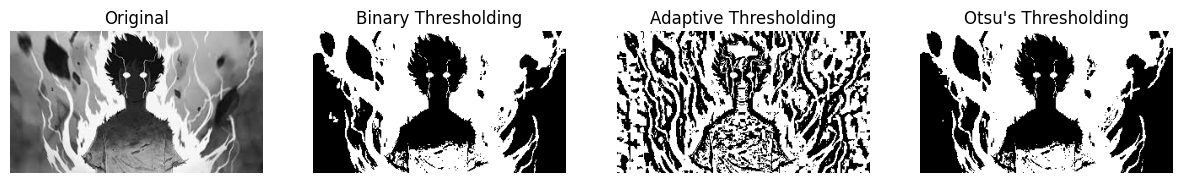

In [ ]:
# Read the grayscale image
image = cv2.imread('../images/task1.jpeg', cv2.IMREAD_GRAYSCALE)
# Apply thresholding methods
_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
_, otsu_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_OTSU)

display_images([image, binary_thresh, adaptive_thresh, otsu_thresh],['Original', 'Binary Thresholding', 'Adaptive Thresholding', 'Otsu\'s Thresholding'], cmap='gray')


### (c) Observations:
Otsu's thresholding outperformed binary and adaptive methods in achieving superior segmentation results, as demonstrated in the code implementation. By automatically calculating the optimal threshold value, Otsu's method analyzes the image's intensity histogram and maximizes the variance between classes. This approach results in clearer object boundaries and significantly reduced noise, as it effectively adapts to the image's bimodal distribution to determine the most suitable threshold.

### Question:2

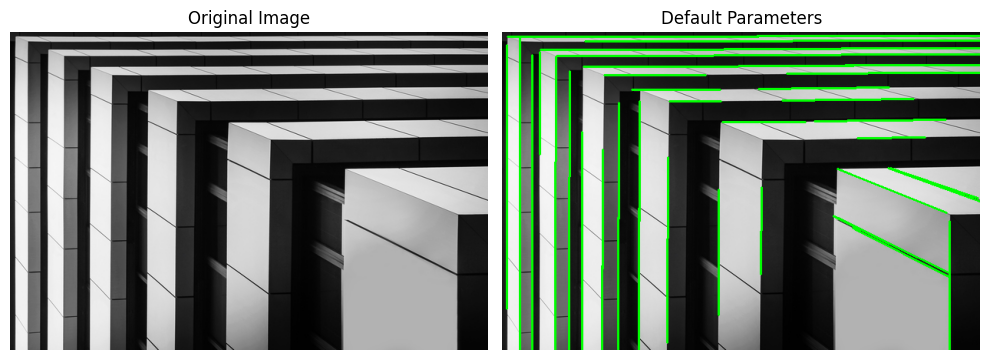

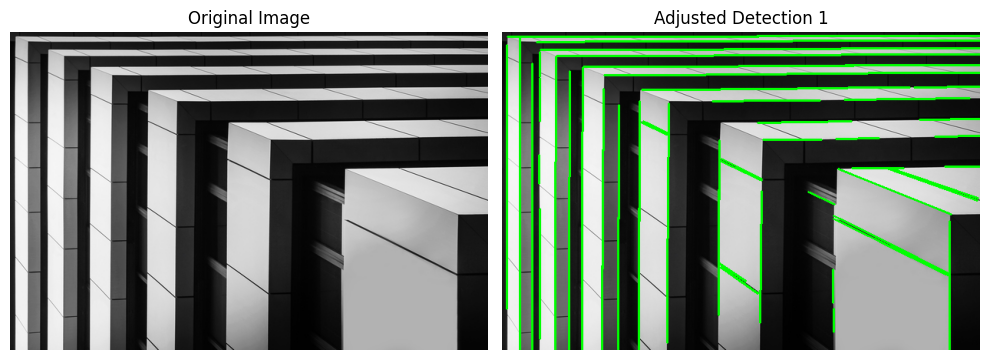

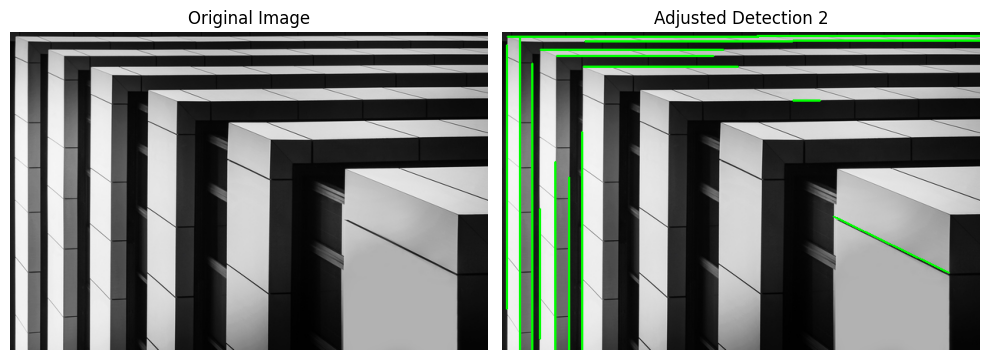

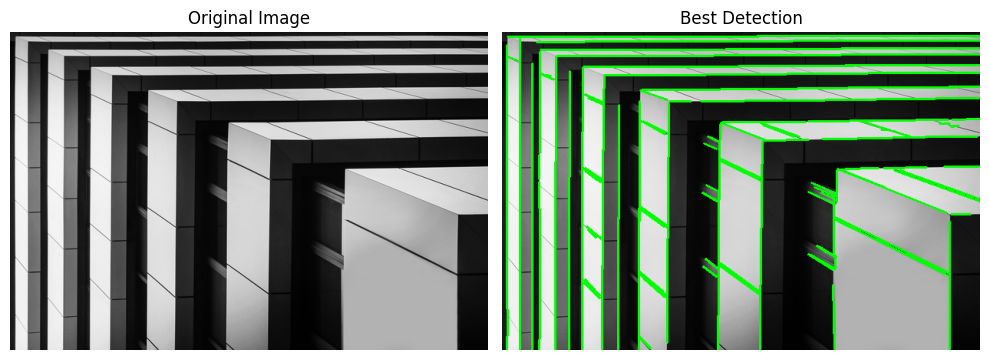

In [10]:
def preprocess_image(gray_image, canny_low=50, canny_high=150):
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    edges = cv2.Canny(blurred_image, canny_low, canny_high)
    return edges

def detect_lines(edges, rho=1, theta=np.pi/180, threshold=100, min_line_length=50, max_line_gap=10):
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)
    return lines

def visualize_lines(original_image, lines):
    output_image = original_image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return output_image

def plot_results(original_image, line_image, title='Detected Lines'):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)

    plt.tight_layout()
    plt.show()

def load_and_process_image(image_path):
    original = cv2.imread(image_path)
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    return original, gray

def process_scenarios(image_path):
    original_image, gray_image = load_and_process_image(image_path)
    edges = preprocess_image(gray_image)
    lines = detect_lines(edges)
    default_line_image = visualize_lines(original_image, lines)
    plot_results(original_image, default_line_image, 'Default Parameters')

    parameter_sets = [
        {'canny_low': 100, 'canny_high': 200, 'threshold': 50, 'min_line_length': 30, 'title': 'Adjusted Detection 1'},
        {'canny_low': 100, 'canny_high': 150, 'threshold': 200, 'min_line_length': 30, 'title': 'Adjusted Detection 2'},
        {'canny_low': 100, 'canny_high': 150, 'threshold': 10, 'min_line_length': 10, 'title': 'Best Detection'}
    ]

    for params in parameter_sets:
        edge_image = preprocess_image(gray_image, params['canny_low'], params['canny_high'])
        lines = detect_lines(edge_image, threshold=params['threshold'], min_line_length=params['min_line_length'])
        line_image = visualize_lines(original_image, lines)
        plot_results(original_image, line_image, params['title'])

image_path = '../images/task2.png'
process_scenarios(image_path)


#### **Parameter Modifications**

##### **Canny Edge Detection Thresholds:**
- Increased from default **(50, 150)** to **(100, 200)**.
- Resulted in reduced edge noise and improved edge quality.

##### **Hough Transform Parameters:**
- **Threshold:** Varied from **100** to **10**.
- **Minimum Line Length:** Reduced from **50** to **10**.


#### **Results**
- **Initial Parameters:** Captured prominent lines with broad detection.
- **Progressive Adjustments:** Refined line detection, improving accuracy.
- **Final Scenario (Threshold=10, Min Line Length=10):** Successfully revealed the most subtle linear structures.


#### **Key Insights**
- Higher **Canny thresholds** effectively reduce edge detection noise.
- Decreasing the **Hough Transform threshold** increases sensitivity to detect more lines.
- Reducing the **minimum line length** captures intricate and fine linear features, enhancing the detection of subtle structures.


### Question:3

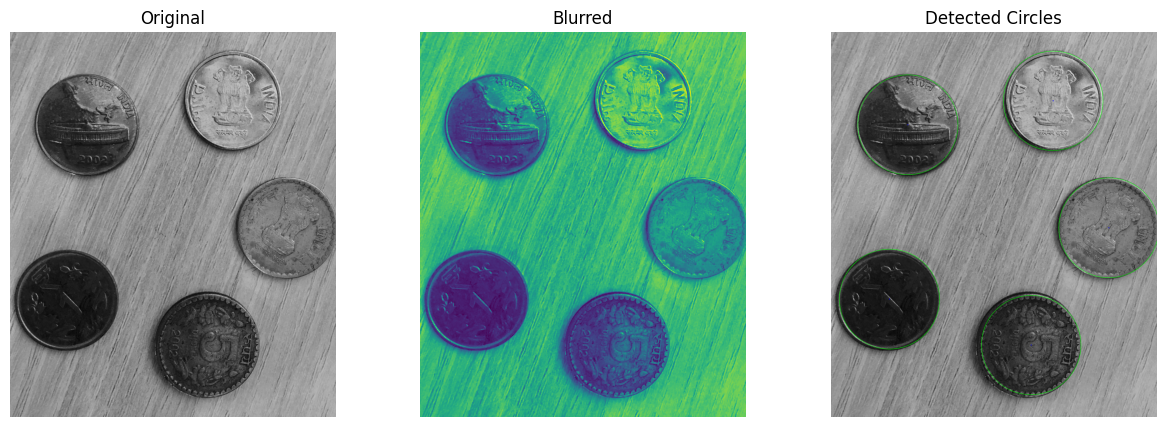

Number of circles detected: 5


In [11]:
circle_image = cv2.imread('../images/task3.jpg', cv2.IMREAD_COLOR)
gray_circle_image = cv2.cvtColor(circle_image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.medianBlur(gray_circle_image, 5)


param = {
    'maxRadius': 350,
    'param2': 150,
    'minRadius': 150,
    'minDist': 250,
    'param1': 200
}

circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, **param, dp=2.5)

circle_image_copy = circle_image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_image_copy, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_image_copy, (i[0], i[1]), 2, (0, 0, 255), 3)

display_images([circle_image, blurred_image, circle_image_copy], ['Original', 'Blurred', 'Detected Circles'])
print(f'Number of circles detected: {circles.shape[1]}')

### Question:4

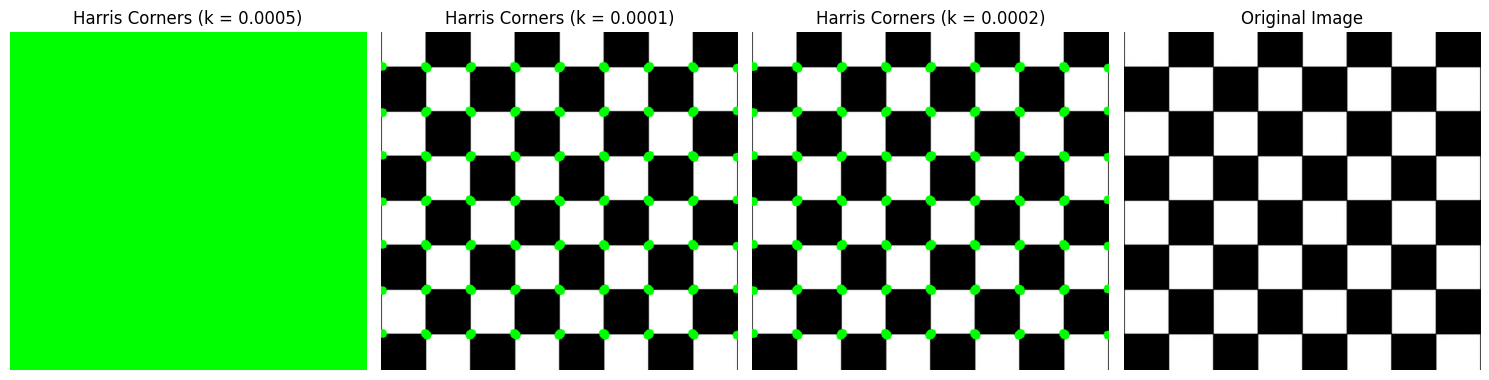

In [12]:
def preprocess_image(image, blur_kernel=(5, 5), sigma=0):
    blurred = cv2.GaussianBlur(image, blur_kernel, sigma)
    return blurred


def harris_corner_detection(image, block_size=2, ksize=3, k=0.04, threshold=0.01):
    dst = cv2.cornerHarris(image, block_size, ksize, k)

    dst_norm = np.empty(dst.shape, dtype=np.float32)
    cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    _ = cv2.convertScaleAbs(dst_norm)

    corners = []
    for i in range(dst_norm.shape[0]):
        for j in range(dst_norm.shape[1]):
            if dst_norm[i, j] > (threshold * dst_norm.max()):
                corners.append((j, i))

    return corners, dst_norm


def mark_corners(image, corners, color=(0, 255, 0), radius=5):
    marked_image = image.copy()
    for corner in corners:
        cv2.circle(marked_image, corner, radius, color, -1)
    return marked_image


def visualize_harris_corner_detection(original_image, gray_image, k_values=[0.0005, 0.0001, 0.0002]):
    plt.figure(figsize=(15, 5))
    for i, k in enumerate(k_values):
        preprocessed_image = preprocess_image(gray_image)
        corners, _ = harris_corner_detection(preprocessed_image, k=k)
        marked_image = mark_corners(original_image, corners)
        plt.subplot(1, len(k_values)+1, i+1)
        plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Harris Corners (k = {k})')
        plt.axis('off')

    plt.subplot(1, len(k_values)+1, len(k_values)+1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


original_image = cv2.imread('../images/task4.jpg')
gray_image = cv2.imread('../images/task4.jpg', cv2.IMREAD_GRAYSCALE)

visualize_harris_corner_detection(original_image, gray_image)

When applying Harris Corner Detection to the given image with varying values of the parameter \( k \), it was observed that for \( k > 0.0004 \), the algorithm detected a dense cluster of corner points, covering much of the image. This behavior indicates that higher \( k \) values increase the sensitivity of the detection process to minor intensity variations, often leading to an over-detection of corners, particularly in highly structured patterns like a checkerboard. Conversely, lower \( k \) values yield more selective and precise corner detection, focusing on significant intensity changes and reducing false positives.

### Question:5

### Refined Explanation of the Hough Transform for Line and Circle Detection

The Hough Transform detects lines by converting edge points in an image into curves in Hough space, representing all possible lines passing through each point. The intersection of these curves indicates the parameters of potential lines, expressed as either \((m, b)\) (slope-intercept form) or \((\rho, \theta)\) (polar form). The polar representation is particularly useful as it avoids issues with vertical lines. A voting mechanism in an accumulator array identifies likely line parameters, with advanced methods incorporating gradient orientation to enhance efficiency. Detected lines are traced on the edge map, and the threshold in the accumulator array is generally set lower for lines, as their structure generates strong peaks in the array.

For circle detection, the Hough Transform maps edge points to potential circle centers in Hough space \((a, b, r)\). If the radius \(r\) is known, each edge point maps to a circle in 2D space. When the radius is unknown, edge points map to cones in 3D Hough space, significantly increasing computational complexity. Incorporating gradient orientation focuses computations on likely circle centers, improving accuracy and reducing computational effort. The accumulator threshold for circles balances noise tolerance and the need for sufficient votes to confirm valid circle structures.

The computational complexity of the Hough Transform increases from \(O(n \times m)\) for lines to \(O(n \times m \times r)\) for circles. To mitigate this, optimization techniques are employed, such as:
- Fixing the radius to reduce dimensionality.
- Utilizing gradient direction to narrow the parameter search space.
- Implementing multi-stage approaches with varying thresholds for different parameters. 

These strategies enhance efficiency while maintaining reliable detection of both lines and circles.